## Импорт библиотек

In [8]:
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, probplot, skew

In [2]:
import warnings

warnings.filterwarnings('ignore')

## Генерируем данные

In [3]:
data = make_classification(n_samples=10000, n_features=6)

X = pd.DataFrame(data[0])
X['cluster'] = data[1]

X.head()

,0,1,2,3,4,5,cluster
0,-0.530450,0.453831,-0.774015,-0.875856,0.332298,0.196742,1
1,0.902928,-0.390526,2.315326,-0.105273,0.270480,0.020266,1
2,-1.494730,-0.411101,0.417104,1.292055,-0.396836,-0.210864,1
3,-1.292289,-0.452634,-1.551236,0.481938,-1.115214,-0.463247,0
4,1.533430,-0.608995,0.319598,-1.523653,-0.688499,-0.346653,0


## Разведочный анализ

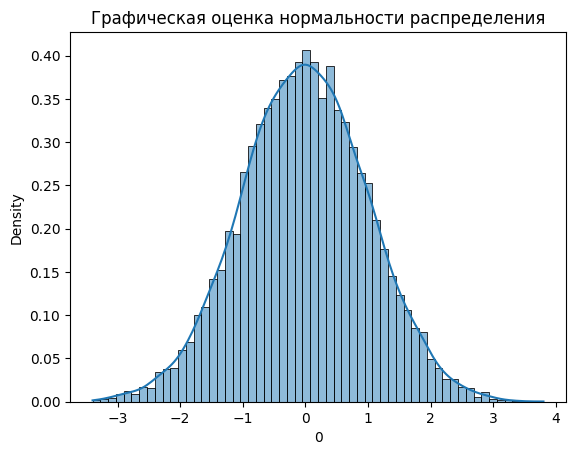

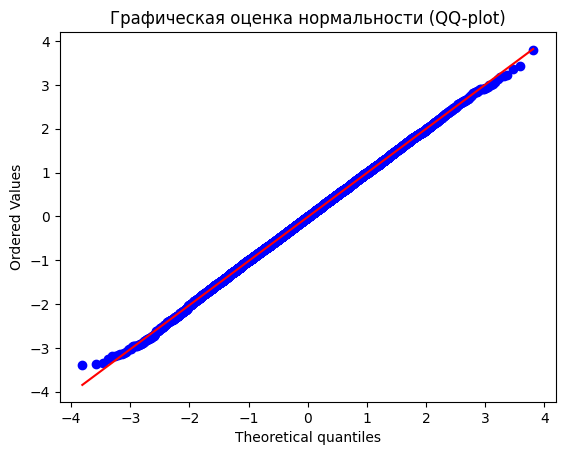

Атрибут: 0
Статистика Шапиро-Уилка: 1.000, p-value: 0.730
Коэффициент асимметрии: -0.014
Вывод: Распределение нормально!
Мера скошенности: ассиметрия влево (отрицательная)


In [5]:
for col in X:
  # Графическая оценка плотности распределения
  sns.histplot(X[col], kde=True, stat='density')
  plt.title('Графическая оценка нормальности распределения')
  plt.show()

  # Графическая оценка нормальности (QQ-plot)
  probplot(X[col], plot=plt)
  plt.title('Графическая оценка нормальности (QQ-plot)')
  plt.show()

  stats, p = shapiro(X[col])
  skewness = skew(X[col])
  print(f'Атрибут: {col}')
  print(f'Статистика Шапиро-Уилка: {stats:.3f}, p-value: {p:.3f}')
  print(f'Коэффициент асимметрии: {skewness:.3f}')


  if p < 0.05:
      print('Вывод: Распределение отличается от нормального!')
  else:
      print('Вывод: Распределение нормально!')

  if skewness < 0:
    print('Мера скошенности: ассиметрия влево (отрицательная)')
  elif skewness > 0:
    print('Мера скошенности: ассиметрия вправо (положительная)')

  else:
    print('Мера скошенности: симметрично')



  break

## Поиск значимых атрибутов

## Корреляция

Чем выше (по модулю) значение корреляции, тем больше влияние признака на разделение объектов.

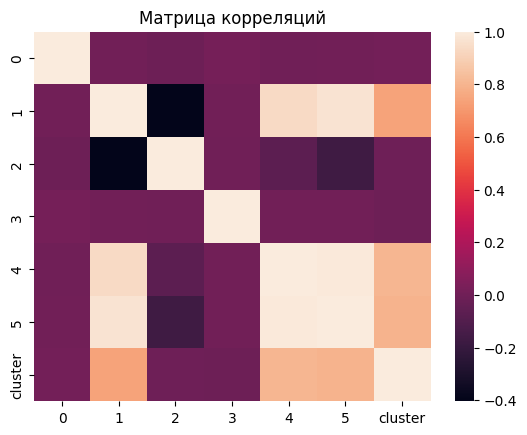

In [6]:
X_corr = X.corr()

sns.heatmap(X_corr)
plt.title('Матрица корреляций');

Влияние признака на образование кластера по убыванию

In [7]:
X_corr['cluster'].drop('cluster').sort_values(ascending=False)

,cluster
4,0.805920
5,0.796333
1,0.741577
0,0.009118
2,-0.008168
3,-0.010184


Из таблицы видно, что атрибут 4 больше всего коррелирует с меткой кластера.

## Feature Importance

In [14]:
X_train, y_train = X.drop(['cluster'], axis=1), X['cluster']
model = RandomForestClassifier()
model.fit(X_train, y_train)
pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
4,4,0.382441
5,5,0.302645
1,1,0.187494
2,2,0.055522
3,3,0.036009
0,0,0.035890
